In [5]:
#Importing the necessary libraries
import numpy as np
import pandas as pd

In [6]:
#Reading the dataset
data=pd.read_csv('Churn_modelling.csv')

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,225,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,629,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,NaN,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        9999 non-null   object 
 5   Gender           9999 non-null   object 
 6   Age              9999 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [10]:
#statastical analysis
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.00000,9999.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.48290,38.924892,5.012800,76489.148004,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.72014,10.486670,2.892174,62399.589585,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,225.00000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.00000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.00000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,717.25000,44.000000,7.000000,127651.035000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.00000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
data.shape

(10000, 14)

# DATA MINING

In [12]:
#dropping unwanted columns
col=['RowNumber','CustomerId','Surname']
data=data.drop(columns=col,axis=1)

In [13]:
#checking for null values
data.isnull().any()

CreditScore        False
Geography           True
Gender              True
Age                 True
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [14]:
#finding the sum of null values under each category
data.isnull().sum()

CreditScore        0
Geography          1
Gender             1
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
#unique values present under "Gender column"
data["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [16]:
#unique values present under "Geography column"
data["Geography"].unique()

array(['France', 'Spain', nan, 'Germany'], dtype=object)

In [17]:
#Replacing the null values under column "Gender" with mode
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)

In [18]:
#Replacing the null values under column "Geography" with mode
data["Geography"].fillna(data["Geography"].mode()[0],inplace=True)

In [19]:
#Replacing the null values under column "Age" with mean
data["Age"].fillna(data["Age"].mean(),inplace=True)

# EXPLORATORY DATA ANALYSIS

In [20]:
#Frequency Tables
#One-way Table
pd.crosstab(index=data["Gender"],columns='count')

col_0,count
Gender,
Female,4542
Male,5458


In [21]:
#Two-way table
pd.crosstab(index=data["HasCrCard"],columns=data["IsActiveMember"])

IsActiveMember,0,1
HasCrCard,,
0,1401,1544
1,3448,3607


In [22]:
#Two-way Table - joint probability
pd.crosstab(index=data["Geography"],columns=data["Gender"],normalize=True)

Gender,Female,Male
Geography,,
France,0.2262,0.2753
Germany,0.1192,0.1317
Spain,0.1088,0.1388


In [23]:
#Two-way Table - marginal probability
pd.crosstab(index=data["Geography"],columns=data["HasCrCard"],margins=True,normalize=True)

HasCrCard,0,1,All
Geography,,,
France,0.1471,0.3544,0.5015
Germany,0.0718,0.1791,0.2509
Spain,0.0756,0.1720,0.2476
All,0.2945,0.7055,1.0000


In [24]:
#Two-way Table - conditional probability
pd.crosstab(index=data["Geography"],columns=data["IsActiveMember"],margins=True,normalize='index')

IsActiveMember,0,1
Geography,,
France,0.483151,0.516849
Germany,0.502591,0.497409
Spain,0.470517,0.529483
All,0.484900,0.515100


In [25]:
#Two-way Table- conditional probability (for columns)
pd.crosstab(index=data["Gender"],columns=data["IsActiveMember"],margins=True,normalize='columns')

IsActiveMember,0,1,All
Gender,,,
Female,0.465663,0.443409,0.4542
Male,0.534337,0.556591,0.5458


In [26]:
#Two-way Table
pd.crosstab(index=data["Gender"],columns=data["Exited"])

Exited,0,1
Gender,,
Female,3404,1138
Male,4559,899


In [27]:
#Two-way Table
pd.crosstab(index=data["Geography"],columns=data["Exited"])

Exited,0,1
Geography,,
France,4205,810
Germany,1695,814
Spain,2063,413


In [28]:
#correlation - exclude categorical variables
numerical_data=data.select_dtypes(exclude=[object])

In [29]:
#correlation
corr_matrix=numerical_data.corr()
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004397,0.001382,0.006584,0.012753,-0.004893,0.024910,-0.001109,-0.026509
Age,-0.004397,1.000000,-0.010256,0.028240,-0.030709,-0.011532,0.085487,-0.007336,0.285219
Tenure,0.001382,-0.010256,1.000000,-0.012236,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006584,0.028240,-0.012236,1.000000,-0.304127,-0.014939,-0.010138,0.012779,0.118502
NumOfProducts,0.012753,-0.030709,0.013444,-0.304127,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.004893,-0.011532,0.022583,-0.014939,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.024910,0.085487,-0.028362,-0.010138,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001109,-0.007336,0.007784,0.012779,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.026509,0.285219,-0.014001,0.118502,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# Data visualization

<AxesSubplot:xlabel='Geography', ylabel='count'>

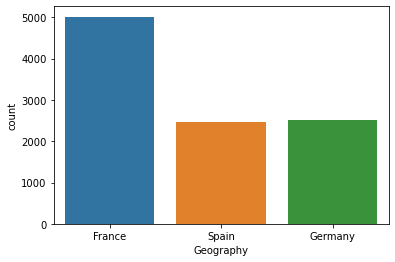

In [30]:
#seaborn library is used for categorical variables
import seaborn as sns
sns.countplot(x ='Geography', data = data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

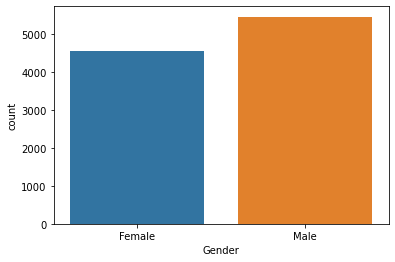

In [31]:
sns.countplot(x ='Gender', data = data)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

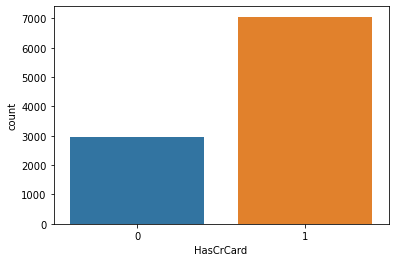

In [32]:
sns.countplot(x ='HasCrCard', data = data)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

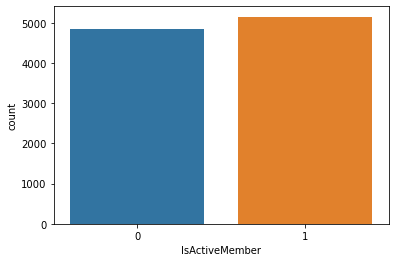

In [33]:
sns.countplot(x ='IsActiveMember', data = data)

<AxesSubplot:xlabel='Gender', ylabel='Exited'>

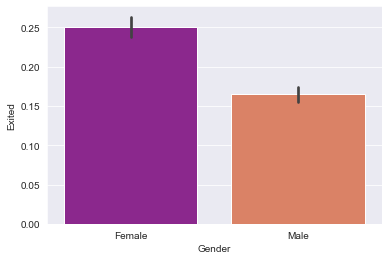

In [34]:
sns.set_style('darkgrid')
sns.barplot(x ='Gender', y ='Exited', data = data, palette ='plasma')
 

<AxesSubplot:xlabel='HasCrCard', ylabel='Exited'>

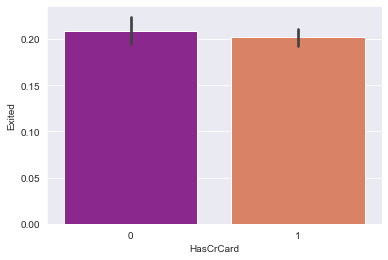

In [35]:
sns.set_style('darkgrid')
sns.barplot(x ='HasCrCard', y ='Exited', data = data, palette ='plasma')
 

<AxesSubplot:xlabel='IsActiveMember', ylabel='Exited'>

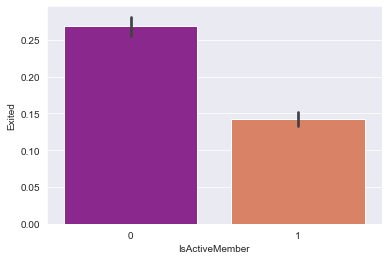

In [36]:
sns.set_style('darkgrid')
sns.barplot(x ='IsActiveMember', y ='Exited', data = data, palette ='plasma')
 

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

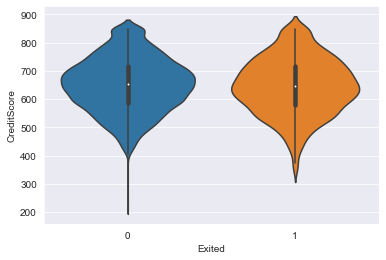

In [37]:
#non categorical variables
import matplotlib as plt
# violin plot illustration
sns.violinplot(x='Exited', y='CreditScore', data=data,sharey=True, figsize=(10, 4) )

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

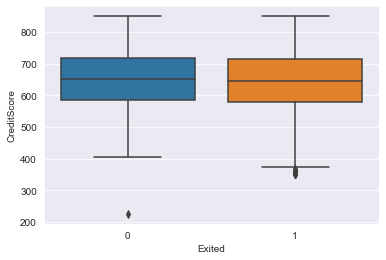

In [38]:
# box plot illustration
sns.boxplot(x='Exited', y='CreditScore', data=data )
 

<AxesSubplot:xlabel='Exited', ylabel='Age'>

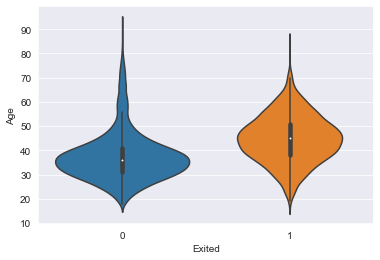

In [39]:
# violin plot illustration
sns.violinplot(x='Exited', y='Age', data=data,sharey=True, figsize=(10, 4) )


<AxesSubplot:xlabel='Exited', ylabel='Age'>

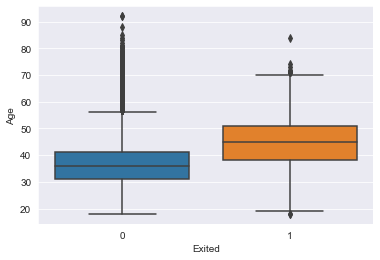

In [40]:
# box plot illustration
sns.boxplot(x='Exited', y='Age', data=data )

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

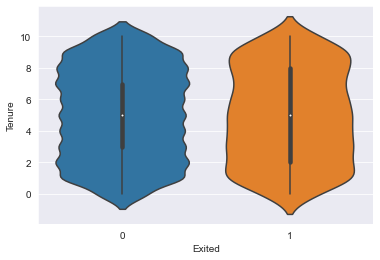

In [41]:
# violin plot illustration
sns.violinplot(x='Exited', y='Tenure', data=data,sharey=True, figsize=(10, 4) )

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

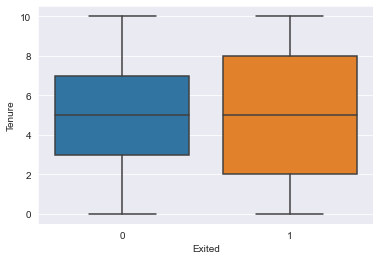

In [42]:
# box plot illustration
sns.boxplot(x='Exited', y='Tenure', data=data )

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

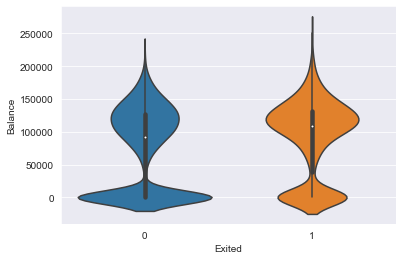

In [43]:
# violin plot illustration
sns.violinplot(x='Exited', y='Balance', data=data,sharey=True, figsize=(10, 4) )

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

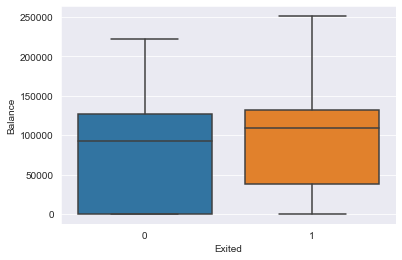

In [44]:
# box plot illustration
sns.boxplot(x='Exited', y='Balance', data=data )

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

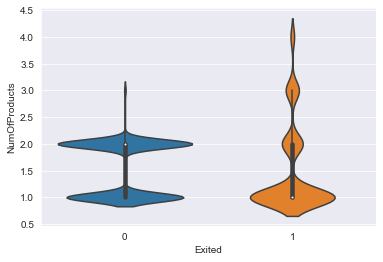

In [45]:
# violin plot illustration
sns.violinplot(x='Exited', y='NumOfProducts', data=data,sharey=True, figsize=(10, 4) )

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

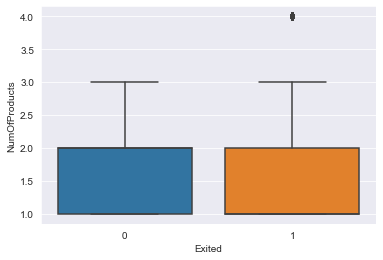

In [46]:
# box plot illustration
sns.boxplot(x='Exited', y='NumOfProducts', data=data )

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

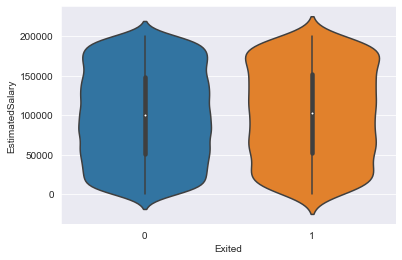

In [47]:
# violin plot illustration
sns.violinplot(x='Exited', y='EstimatedSalary', data=data,sharey=True, figsize=(10, 4) )

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

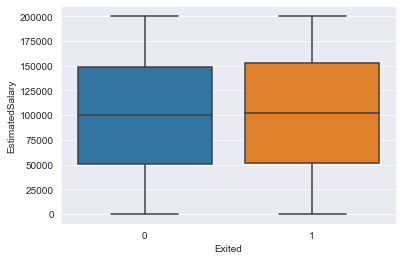

In [48]:
# box plot illustration
sns.boxplot(x='Exited', y='EstimatedSalary', data=data )

# Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Geography"]=le.fit_transform(data["Geography"])
data["Gender"]=le.fit_transform(data["Gender"])

# Feature Selection

In [50]:
x=data.iloc[:,3:13]
y=data.iloc[:,13:14]

In [51]:
x

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,42.0,2,0.00,1,1,1,101348.88,1
1,41.0,1,83807.86,1,0,1,112542.58,0
2,42.0,8,159660.80,3,1,0,113931.57,1
3,39.0,1,0.00,2,0,0,93826.63,0
4,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,39.0,5,0.00,2,1,0,96270.64,0
9996,35.0,10,57369.61,1,1,1,101699.77,0
9997,36.0,7,0.00,1,0,1,42085.58,1
9998,42.0,3,75075.31,2,1,0,92888.52,1


In [52]:
#information gain
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(['Exited'],axis='columns',inplace=False),data['Exited'],test_size=0.3,random_state=0)

In [53]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual_info
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([0.01390598, 0.01509945, 0.00450869, 0.06180747, 0.00140228,
       0.01076166, 0.07052825, 0.00023923, 0.01892631, 0.00043208])

In [54]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

NumOfProducts      0.070528
Age                0.061807
IsActiveMember     0.018926
Geography          0.015099
CreditScore        0.013906
Balance            0.010762
Gender             0.004509
Tenure             0.001402
EstimatedSalary    0.000432
HasCrCard          0.000239
dtype: float64

<AxesSubplot:>

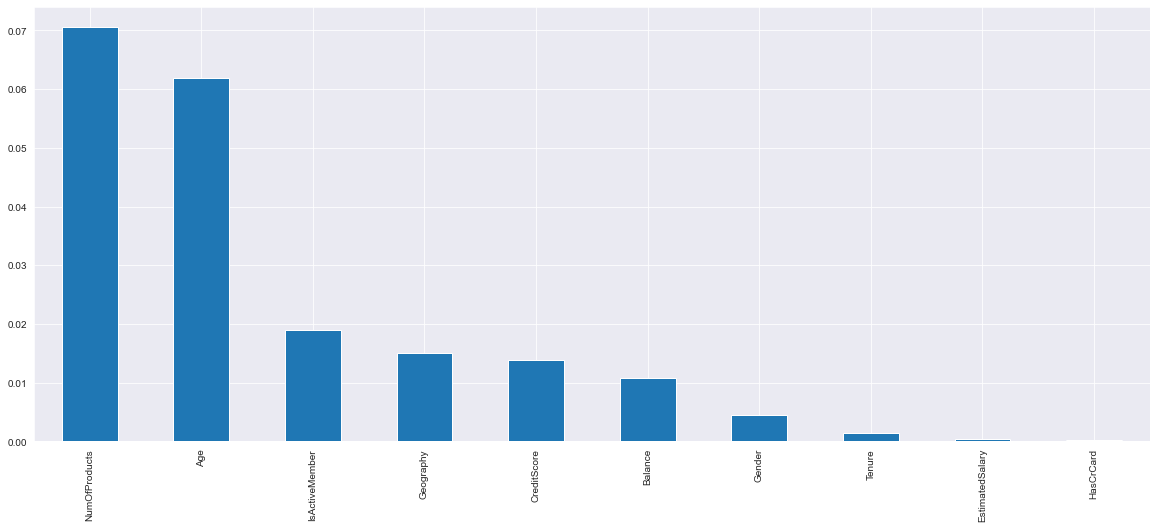

In [55]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [56]:
#selecting top 5 features
from sklearn.feature_selection import SelectKBest
sel_five_cols=SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(x_train,y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['CreditScore', 'Geography', 'Age', 'NumOfProducts', 'IsActiveMember'], dtype='object')

In [57]:
#fisher score - chisquare (especially for categorical variables)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['Geography','Gender','HasCrCard','IsActiveMember']],data['Exited'],test_size=0.3,random_state=2)

In [58]:
#chi2 returns 2 values
#Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(x_train,y_train)
f_p_values


(array([1.06139775e+01, 4.50414931e+01, 7.90228089e-02, 8.16845778e+01]),
 array([1.12236000e-03, 1.92903429e-11, 7.78626063e-01, 1.59634319e-19]))

In [59]:
p_values=pd.Series(f_p_values[1])
p_values.index=x_train.columns
p_values


Geography         1.122360e-03
Gender            1.929034e-11
HasCrCard         7.786261e-01
IsActiveMember    1.596343e-19
dtype: float64

In [60]:
p_values.sort_index(ascending=False)

IsActiveMember    1.596343e-19
HasCrCard         7.786261e-01
Geography         1.122360e-03
Gender            1.929034e-11
dtype: float64

#observation
IsActiveMember is the most important column (amongst categorical) when compared to the output feature Exited


# TESTING UPON VARIOUS MACHINE LEARNING MODELS

In [61]:

from sklearn.ensemble import RandomForestClassifier 
forest_reg=RandomForestClassifier()
forest_reg.fit(x_train, y_train)
y_pred=forest_reg.predict(x_test)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_test,y_pred)))

RMSLE: 30.60855071937404


In [65]:
from sklearn.neighbors import KNeighborsClassifier 
KNN=KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred=KNN.predict(x_test)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_test,y_pred)))


RMSLE: 31.53629240748945


In [66]:
from sklearn.tree import DecisionTreeClassifier 
DT=DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred=DT.predict(x_test)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_test,y_pred)))

RMSLE: 30.60855071937404


In [64]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_test,y_pred)))

RMSLE: 30.60855071937404
